In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/supershops.csv",sep=',')

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df.isnull().sum()

,0
Marketing Spend,0
Administration,0
Transport,1
Area,0
Profit,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

,0
Marketing Spend,0
Administration,0
Transport,0
Area,0
Profit,0


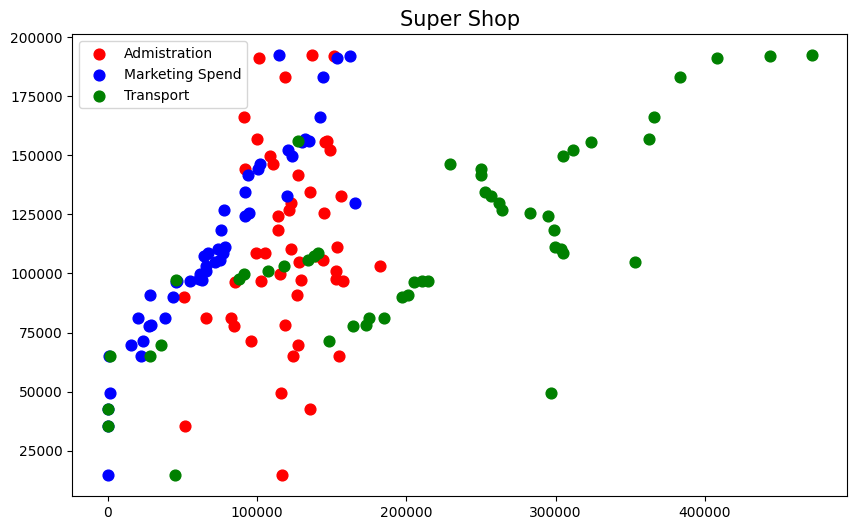

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(df['Administration'],df['Profit'],color='red',s=60,label='Admistration')
plt.scatter(df['Marketing Spend'],df['Profit'],color='blue',s=60,label='Marketing Spend')
plt.scatter(df['Transport'],df['Profit'],color='green',s=60, label='Transport')
plt.title("Super Shop", fontsize=15, loc = 'center')

#plt.show()
plt.legend()

In [21]:
df.drop(['Area'],axis=1).corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


In [72]:
x = df.drop(['Area','Profit'],axis=1)

In [73]:
y = df['Profit']

In [74]:
xtarin,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=42)

In [10]:
xtarin.shape

(36, 3)

In [11]:
xtest.shape

(13, 3)

In [12]:
df.drop(['Area'],axis=1).corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


# **Linear Regression**

In [13]:
reg = LinearRegression()
reg.fit(xtarin,ytrain)

LinearRegression()

In [14]:
y_predict = reg.predict(xtest)
y_predict

array([128028.55663806,  79467.9396043 ,  40537.10362512,  43904.14090341,
       133588.18878948,  98417.37372374, 128228.13902101, 104254.23301324,
        86035.10281179, 123509.62644679, 128460.03672878, 169390.28917217,
        93373.26193869])

In [15]:
ytest

,Profit
13,134307.35
46,49490.75
48,35673.41
45,64926.08
17,125370.37
28,103282.38
27,105008.31
26,105733.54
32,97427.84
20,118474.03


# **Scores of Linear Regression**

In [16]:
reg.score(xtarin,ytrain) # Training Score

0.9065112845517316

In [17]:
reg.score(xtest,ytest) # Testing Score

0.852236265156313

In [24]:
df2 = df.copy()

In [28]:
df2['Predicted Profit'] = reg.predict(df[['Marketing Spend','Administration','Transport']])

In [29]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit,Predicted Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83,167797.737276
1,162597.70,151377.59,443898.53,Ctg,191792.06,193180.822110
2,153441.51,101145.55,407934.54,Rangpur,191050.39,181473.210338
3,144372.41,118671.85,383199.62,Dhaka,182901.99,173858.830444
4,142107.34,91391.77,366168.42,Rangpur,166187.94,169390.289172


In [30]:
mse = mean_squared_error(ytest,y_predict)
mse

183347387.9170187

In [31]:
mae = mean_absolute_error(ytest,y_predict)
mae

10445.076223166347

# **Polynomial Regression**

In [32]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [34]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,train_size=0.75,random_state=10)

In [41]:
reg2 = LinearRegression()
reg2.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = reg2.predict(x_test)
y_pred

array([ 58574.03364502, 110796.27637947,  72433.42193997,  65704.84425251,
        50061.84342785, 128650.73891838, 169289.42191889,  99299.36139937,
       151989.84873251, 116324.84271049,  81103.66693667, 178478.15220447,
        73784.96800112])

In [44]:
y_test

,Profit
38,81229.06
24,108552.04
44,65200.33
42,71498.49
47,42559.73
21,111313.02
3,182901.99
31,97483.56
7,155752.60
6,156122.51


# **Score of 2 Degree Polynomial**

In [45]:
reg2.score(x_train,y_train)

0.9288225426866178

In [46]:
reg2.score(x_test,y_test)

0.8915479324186738

In [54]:
mse = mean_squared_error(y_test,y_pred)
mse

225044460.74997523

In [55]:
mae = mean_absolute_error(y_test,y_pred)
mae

10683.054425899301

In [48]:
poly2 = PolynomialFeatures(degree=3)
x_poly2 = poly2.fit_transform(x)

In [49]:
pd.DataFrame(x_poly2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11,1.502052e+15,1.795505e+15,6.187759e+15,2.146288e+15,7.396645e+15,2.549069e+16,2.565603e+15,8.841709e+15,3.047074e+16,1.050098e+17
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11,4.298760e+15,4.002123e+15,1.173579e+16,3.725955e+15,1.092596e+16,3.203921e+16,3.468844e+15,1.017201e+16,2.982833e+16,8.746839e+16
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11,3.612672e+15,2.381401e+15,9.604532e+15,1.569771e+15,6.331114e+15,2.553429e+16,1.034762e+15,4.173343e+15,1.683169e+16,6.788463e+16
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11,3.009211e+15,2.473524e+15,7.987180e+15,2.033198e+15,6.565336e+15,2.119993e+16,1.671257e+15,5.396603e+15,1.742601e+16,5.626978e+16
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11,2.869786e+15,1.845611e+15,7.394587e+15,1.186945e+15,4.755591e+15,1.905365e+16,7.633457e+14,3.058405e+15,1.225375e+16,4.909561e+16


In [50]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x_poly2,y,train_size=0.75,random_state=10)

In [51]:
reg3 = LinearRegression()
reg3.fit(xtrain2,ytrain2)

LinearRegression()

# Scores of 3 Degree Polynomial regression

In [52]:
reg3.score(xtrain2,ytrain2)

0.9556451934606673

In [53]:
reg3.score(xtest2,ytest2)

0.6000780985786215

In [56]:
mae = mean_absolute_error(ytest2,reg3.predict(xtest2)) # too bad
mae

18355.72675132695

In [57]:
mse = mean_squared_error(ytest2,reg3.predict(xtest2)) # Too Bad
mse

829861621.4023712

# **Making PipeLine**

In [59]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())

In [60]:
pipeline.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [61]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [62]:
pipeline.predict(x)[0]

np.float64(191459.90826594073)

In [63]:
pipeline.predict(x)[1]

np.float64(194397.44393928105)

In [64]:
pipeline.score(x,y)

0.9855988888413962

In [65]:
mae = mean_absolute_error(y,pipeline.predict(x))
mae

3819.00893373393

# **Regularization**

In [75]:
lasso = Lasso()
lasso.fit(xtarin,ytrain)

Lasso()

In [93]:
las = lasso.score(xtest,ytest)
las

0.8522362658604351

In [77]:
lasso.score(xtarin,ytrain)

0.9065112845517316

In [78]:
mse = mean_squared_error(ytest,lasso.predict(xtest))
mse

183347387.0433338

In [79]:
mae =mean_absolute_error(ytest,lasso.predict(xtest))
mae

10445.076219705166

In [80]:
ridge = Ridge()
ridge.fit(xtarin,ytrain)

Ridge()

In [92]:
rid = ridge.score(xtest,ytest)
rid

0.8522362651470876

In [82]:
ridge.score(xtarin,ytrain)

0.9065112845517316

In [83]:
mse = mean_squared_error(ytest,lasso.predict(xtest))
mse

183347387.0433338

In [85]:
mae = mean_absolute_error(ytest,lasso.predict(xtest))
mae

10445.076219705166

In [94]:
scores = [las, rid]
models = ['Lasso', 'Ridge']

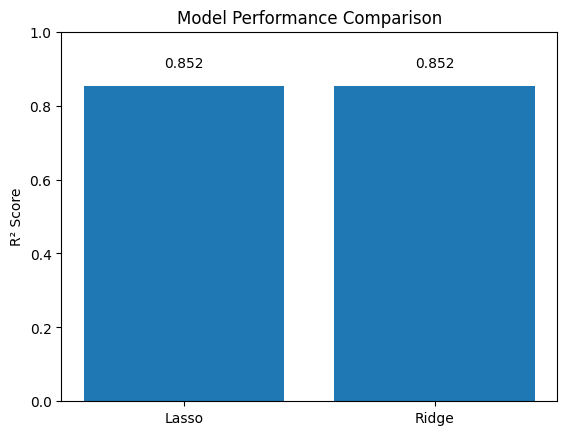

In [95]:
for i, score in enumerate(scores):
    plt.text(i, score+.05,f'{score:.3f}',ha='center')

plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()